In [1]:
# ## 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("✓ Semua libraries berhasil diimport")

✓ Semua libraries berhasil diimport


In [2]:
# ## 2. Load Data & Exploratory Analysis

# Buat dataframe dari data
data = {
    'name': ['Andi', 'Budi', 'Cira', 'Devd', 'Eka', 'Fajar', 'Gina', 'Hadi', 'Indah', 'Jilan'],
    'alamat': ['Jl. Merdeka No. 18', 'Jl. Sudirman No. 5', 'Jl. Thamrin No. 20', 
               'Jl. Gatot Subroto No. 15', 'Jl. Rasuna Said No. 8', 'Jl. Kuningan No. 12',
               'Jl. Cikini No. 3', 'Jl. Palmerah No. 7', 'Jl. Senayan No. 9', 'Jl. Kuningan No. 2'],
    'tinggi': [175, 178, 180, 180, 183, 185, 170, 168, 178, 160]
}

df = pd.DataFrame(data)
print("Dataframe berhasil dibuat")

# Simpan ke CSV (untuk keperluan analisis)
df.to_csv('calon_tni.csv', index=False)
print("File calon_tni.csv berhasil dibuat")

Dataframe berhasil dibuat
File calon_tni.csv berhasil dibuat


In [3]:
# Menampilkan informasi dasar tentang dataset
print("\n=== INFO DATASET ===")
print(df.info())
print("\n")

# Menampilkan 10 baris pertama data
print("=== DATA CALON TNI ===")
print(df)
print("\n")

# Statistik deskriptif untuk kolom numerik
print("=== STATISTIK DESKRIPTIF TINGGI BADAN ===")
print(df['tinggi'].describe())
print("\n")


=== INFO DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    10 non-null     object
 1   alamat  10 non-null     object
 2   tinggi  10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes
None


=== DATA CALON TNI ===
    name                    alamat  tinggi
0   Andi        Jl. Merdeka No. 18     175
1   Budi        Jl. Sudirman No. 5     178
2   Cira        Jl. Thamrin No. 20     180
3   Devd  Jl. Gatot Subroto No. 15     180
4    Eka     Jl. Rasuna Said No. 8     183
5  Fajar       Jl. Kuningan No. 12     185
6   Gina          Jl. Cikini No. 3     170
7   Hadi        Jl. Palmerah No. 7     168
8  Indah         Jl. Senayan No. 9     178
9  Jilan        Jl. Kuningan No. 2     160


=== STATISTIK DESKRIPTIF TINGGI BADAN ===
count     10.000000
mean     175.700000
std        7.645623
min      160.000000
25%      171.25

In [4]:
# Menghitung dan menampilkan nilai penting
print("=== NILAI PENTING ===")
print(f"Rata-rata tinggi : {df['tinggi'].mean():.2f} cm")
print(f"Tertinggi : {df['tinggi'].max()} cm")
print(f"Terendah : {df['tinggi'].min()} cm")
print(f"Median : {df['tinggi'].median()} cm")
print("\n")

# Calon di atas rata-rata
rata_rata = df['tinggi'].mean()
calon_diatas_rata = df[df['tinggi'] > rata_rata]
print("=== CALON DI ATAS RATA-RATA TINGGI ===")
print(calon_diatas_rata)
print("\n")

# Urutkan dari tertinggi ke terendah
df_sorted = df.sort_values('tinggi', ascending=False)
print("=== URUTAN DARI TERTINGGI KE TERENDAH ===")
print(df_sorted)
print("\n")

=== NILAI PENTING ===
Rata-rata tinggi : 175.70 cm
Tertinggi : 185 cm
Terendah : 160 cm
Median : 178.0 cm


=== CALON DI ATAS RATA-RATA TINGGI ===
    name                    alamat  tinggi
1   Budi        Jl. Sudirman No. 5     178
2   Cira        Jl. Thamrin No. 20     180
3   Devd  Jl. Gatot Subroto No. 15     180
4    Eka     Jl. Rasuna Said No. 8     183
5  Fajar       Jl. Kuningan No. 12     185
8  Indah         Jl. Senayan No. 9     178


=== URUTAN DARI TERTINGGI KE TERENDAH ===
    name                    alamat  tinggi
5  Fajar       Jl. Kuningan No. 12     185
4    Eka     Jl. Rasuna Said No. 8     183
3   Devd  Jl. Gatot Subroto No. 15     180
2   Cira        Jl. Thamrin No. 20     180
8  Indah         Jl. Senayan No. 9     178
1   Budi        Jl. Sudirman No. 5     178
0   Andi        Jl. Merdeka No. 18     175
6   Gina          Jl. Cikini No. 3     170
7   Hadi        Jl. Palmerah No. 7     168
9  Jilan        Jl. Kuningan No. 2     160




In [5]:
# ## 3. Deteksi Masalah Data

# Deteksi missing values
print("=== DETEKSI MISSING VALUES ===")
print(df.isnull().sum())
print("\n")

# Deteksi duplikat data
print("=== DETEKSI DUPLIKAT ===")
print(f"Jumlah data duplikat: {df.duplicated().sum()}")
print("\n")

# Deteksi outlier menggunakan IQR method
print("=== DETEKSI OUTLIER ===")
Q1 = df['tinggi'].quantile(0.25)
Q3 = df['tinggi'].quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

outliers = df[(df['tinggi'] < batas_bawah) | (df['tinggi'] > batas_atas)]
print(f"Batas bawah outlier: {batas_bawah:.2f}")
print(f"Batas atas outlier: {batas_atas:.2f}")
print(f"Jumlah outlier: {len(outliers)}")
if len(outliers) > 0:
    print("Data outlier:")
    print(outliers)
else:
    print("Tidak ada outlier detected")
print("\n")

=== DETEKSI MISSING VALUES ===
name      0
alamat    0
tinggi    0
dtype: int64


=== DETEKSI DUPLIKAT ===
Jumlah data duplikat: 0


=== DETEKSI OUTLIER ===
Batas bawah outlier: 158.12
Batas atas outlier: 193.12
Jumlah outlier: 0
Tidak ada outlier detected




In [6]:
# ## 4. Imputasi Data & Analisis Lanjutan

# Membuat salinan dataframe untuk imputasi
df_clean = df.copy()

print("=== PROSES IMPUTASI DATA ===")

# Cek missing values
if df_clean['tinggi'].isnull().sum() > 0:
    print("Melakukan imputasi untuk missing values...")
    median_tinggi = df_clean['tinggi'].median()
    df_clean['tinggi'].fillna(median_tinggi, inplace=True)
    print(f"Missing values diimputasi dengan median: {median_tinggi}")
else:
    print("Tidak ada missing values pada kolom tinggi")

=== PROSES IMPUTASI DATA ===
Tidak ada missing values pada kolom tinggi


In [7]:
# Menambahkan kolom kategori tinggi badan
def kategorisasi_tinggi(tinggi):
    if tinggi >= 180:
        return 'Tinggi'
    elif tinggi >= 170:
        return 'Sedang'
    else:
        return 'Pendek'

df_clean['kategori'] = df_clean['tinggi'].apply(kategorisasi_tinggi)

print("=== DATA DENGAN KATEGORI ===")
print(df_clean)
print("\n")

# Statistik per kategori
print("=== JUMLAH CALON PER KATEGORI ===")
kategori_count = df_clean['kategori'].value_counts()
print(kategori_count)
print("\n")

=== DATA DENGAN KATEGORI ===
    name                    alamat  tinggi kategori
0   Andi        Jl. Merdeka No. 18     175   Sedang
1   Budi        Jl. Sudirman No. 5     178   Sedang
2   Cira        Jl. Thamrin No. 20     180   Tinggi
3   Devd  Jl. Gatot Subroto No. 15     180   Tinggi
4    Eka     Jl. Rasuna Said No. 8     183   Tinggi
5  Fajar       Jl. Kuningan No. 12     185   Tinggi
6   Gina          Jl. Cikini No. 3     170   Sedang
7   Hadi        Jl. Palmerah No. 7     168   Pendek
8  Indah         Jl. Senayan No. 9     178   Sedang
9  Jilan        Jl. Kuningan No. 2     160   Pendek


=== JUMLAH CALON PER KATEGORI ===
kategori
Sedang    4
Tinggi    4
Pendek    2
Name: count, dtype: int64




In [8]:
# Statistik lanjutan
print("=== STATISTIK LANJUTAN ===")
print(f"Standar Deviasi: {df_clean['tinggi'].std():.2f}")
print(f"Variansi: {df_clean['tinggi'].var():.2f}")
print(f"Range: {df_clean['tinggi'].max() - df_clean['tinggi'].min()} cm")
print("\n")

# Calon dengan tinggi badan tertinggi
calon_tertinggi = df_clean[df_clean['tinggi'] == df_clean['tinggi'].max()]
print("=== CALON DENGAN TINGGI BADAN TERTINGGI ===")
print(calon_tertinggi)
print("\n")

=== STATISTIK LANJUTAN ===
Standar Deviasi: 7.65
Variansi: 58.46
Range: 25 cm


=== CALON DENGAN TINGGI BADAN TERTINGGI ===
    name               alamat  tinggi kategori
5  Fajar  Jl. Kuningan No. 12     185   Tinggi




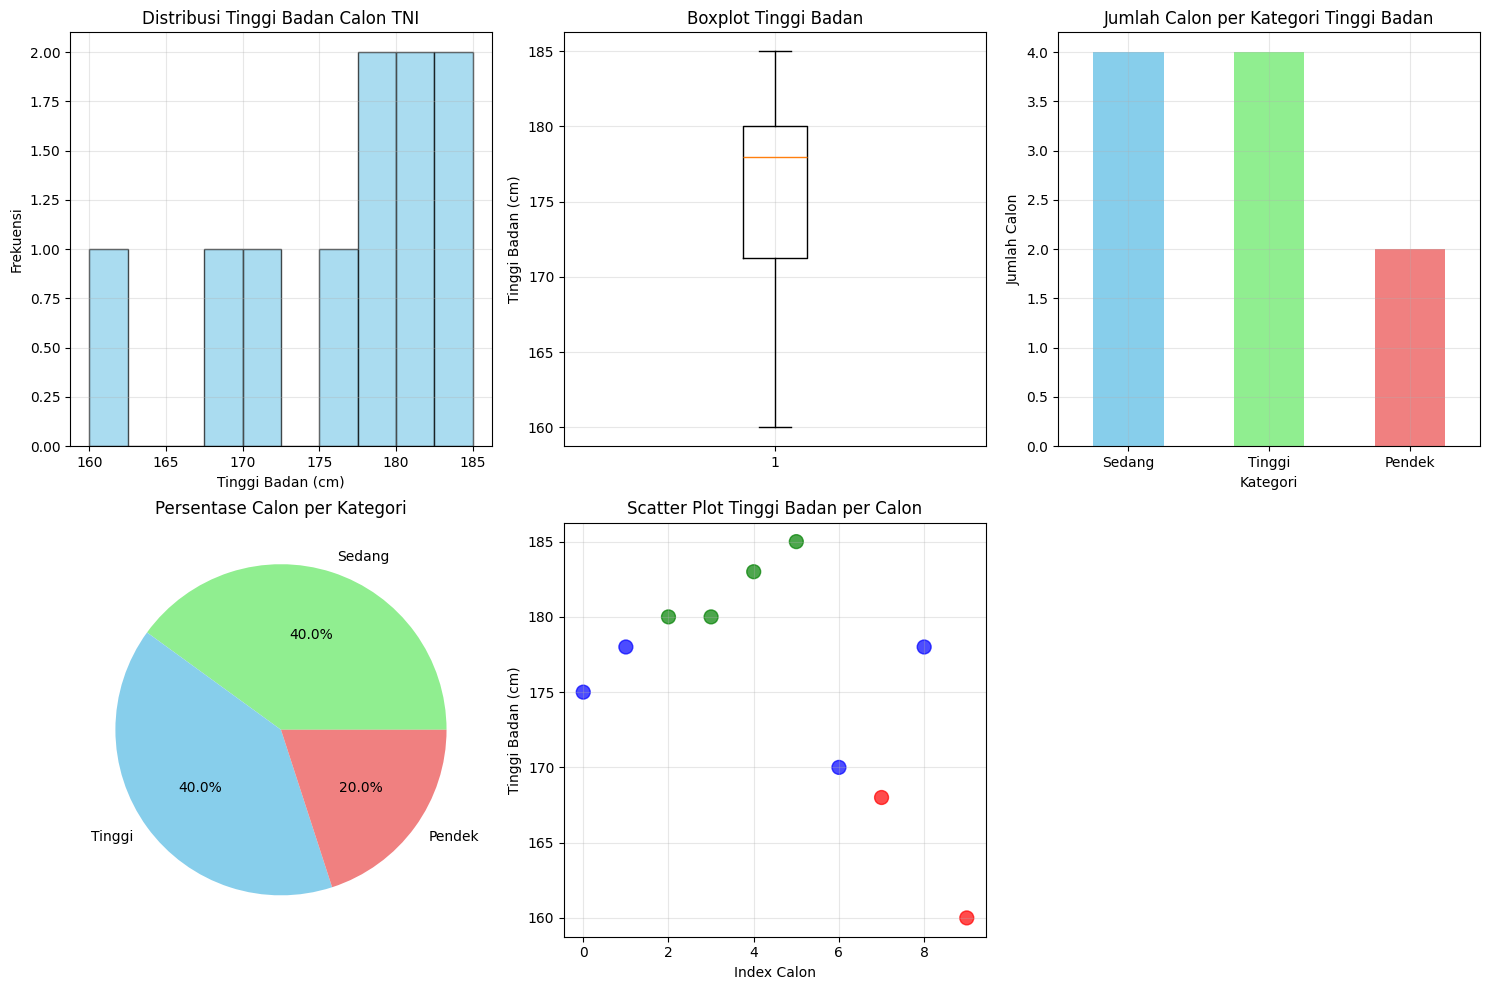

In [9]:
# Visualisasi distribusi tinggi badan
plt.figure(figsize=(15, 10))

# Histogram
plt.subplot(2, 3, 1)
plt.hist(df['tinggi'], bins=10, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribusi Tinggi Badan Calon TNI')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Frekuensi')
plt.grid(True, alpha=0.3)

# Boxplot
plt.subplot(2, 3, 2)
plt.boxplot(df['tinggi'])
plt.title('Boxplot Tinggi Badan')
plt.ylabel('Tinggi Badan (cm)')
plt.grid(True, alpha=0.3)

# Bar plot per kategori
plt.subplot(2, 3, 3)
kategori_count.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Jumlah Calon per Kategori Tinggi Badan')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Calon')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)

# Pie chart per kategori
plt.subplot(2, 3, 4)
kategori_count.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'skyblue', 'lightcoral'])
plt.title('Persentase Calon per Kategori')
plt.ylabel('')

# Scatter plot
plt.subplot(2, 3, 5)
colors = {'Tinggi': 'green', 'Sedang': 'blue', 'Pendek': 'red'}
plt.scatter(range(len(df_clean)), df_clean['tinggi'], 
            c=df_clean['kategori'].map(colors), alpha=0.7, s=100)
plt.title('Scatter Plot Tinggi Badan per Calon')
plt.xlabel('Index Calon')
plt.ylabel('Tinggi Badan (cm)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
# Simpan data yang sudah dibersihkan
df_clean.to_csv('calon_tni_clean.csv', index=False)
print("Data yang sudah dibersihkan disimpan sebagai 'calon_tni_clean.csv'")

# Tampilkan ringkasan akhir
print("\n" + "="*50)
print("RINGKASAN ANALISIS SELESAI")
print("="*50)
print(f"Total calon: {len(df_clean)}")
print(f"Rata-rata tinggi: {df_clean['tinggi'].mean():.2f} cm")
print(f"Distribusi kategori: {dict(kategori_count)}")
print("Analisis berhasil diselesaikan!")

Data yang sudah dibersihkan disimpan sebagai 'calon_tni_clean.csv'

RINGKASAN ANALISIS SELESAI
Total calon: 10
Rata-rata tinggi: 175.70 cm
Distribusi kategori: {'Sedang': np.int64(4), 'Tinggi': np.int64(4), 'Pendek': np.int64(2)}
Analisis berhasil diselesaikan!
